1. Proyecto NetworkX. <br>
Escoge un dataset de tu interés (público o datos con los que estás familiarizado). Recuerda que para trabajar con grafos, las entidades, las relaciones entre sí y sus propiedades deben estar bien definidas. Plantea al menos 3 preguntas de negocio que puedan resolverse en base a consultas analíticas y/o métricas de grafos.
- Trabaja con al menos 1000 nodos (0.5)
- Trabaja con al menos 2000 aristas (0.5)
- Combina el potencial de NetworkX con Gephi (1.0)
- Analiza tus resultados (0.5)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import requests

In [2]:
url = "https://api.gameofthronesquotes.xyz/v1/random/100"


def get_data(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.HTTPError as e:
        print("Error al obtener los datos de la API: " + str(e))
        return None

In [3]:
data = get_data(url)

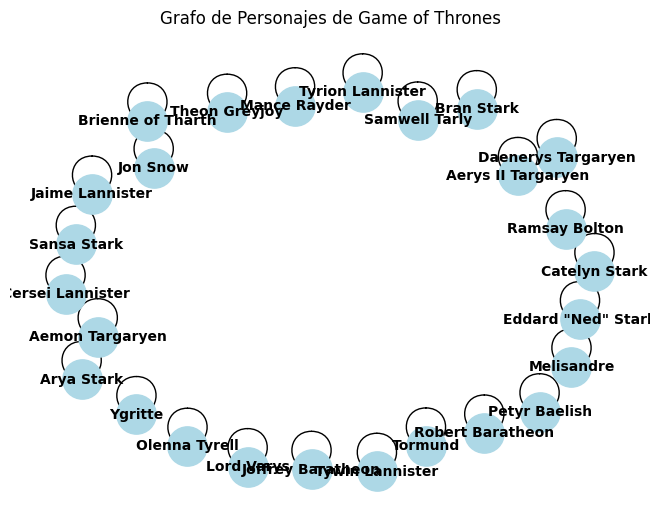

In [9]:
# Crear un grafo vacío
G = nx.Graph()

# Procesar los datos y agregar nodos y conexiones al grafo
for quote in data:
    character1 = quote['character']['name']
    character2 = quote['character']['name'] 

    # Agregar los personajes como nodos si no existen
    G.add_node(character1)
    G.add_node(character2)

    # Agregar una conexión entre los personajes
    G.add_edge(character1, character2)

# Ordenar los nodos del grafo en función de su nombre
nodes = list(G.nodes())
nodes.sort(key=itemgetter(0))  # Ordenar por el primer elemento (nombre)


# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Grafo de Personajes de Game of Thrones")
plt.show()




